In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import titlecase
import time

sns.set_style('whitegrid')
pd.set_option('max_rows', 10)

In [2]:
df = pd.read_csv('Top2000_others.tsv', sep='\t')
df['Artist'] = df['Artist'].str.lower().apply(titlecase.titlecase)
df['Song'] = df['Song'].str.lower().apply(titlecase.titlecase)
display(df)

,Song,Artist,Nominator,Gender,Generation,Country
0,1/1,Brian Eno,Jeff Micklos,M,Millennial,US
1,(Sittin On) the Dock of the Bay,Otis Redding,Suus van Paridon,F,Millennial,NL
2,A Day in a Life,The Beatles,Debra Lightfeldt,F,Boomer,US
3,A Little Respect,Erasure,Alan Lightfeld,M,Millennial,US
4,Aan De Kust,Bløf,Peter van Paridon,M,Boomer,NL
...,...,...,...,...,...,...
505,You Want It Darker,Leonard Cohen,Jeroen van Paridon,M,Millennial,NL
506,Your Song,Elton John,Allison Lightfeldt,F,Millennial,US
507,Your Song,Elton John,Debra Lightfeldt,F,Boomer,US
508,Zeg Me Dat Het Niet Zo Is,Frank Boeijen Groep,Jeroen van Paridon,M,Millennial,NL


In [3]:
def count_votes(df, grouping):
    df = df.groupby(grouping).count().reset_index().drop(columns=['Gender', 'Generation', 'Country'])
    df = df.rename(columns={'Nominator': 'Votes'}).sample(frac=1)
    df = df.sort_values('Votes', ascending=False).reset_index(drop=True)
    return df

In [4]:
pd.set_option('max_rows', None)
df_song_votes = count_votes(df, ['Artist', 'Song'])
display(df_song_votes[df_song_votes['Votes'] > 1])

,Artist,Song,Votes
0,The Eagles,Hotel California,6
1,Queen,Bohemian Rhapsody,6
2,Led Zeppelin,Stairway to Heaven,5
3,Toto,Africa,5
4,Tracy Chapman,Fast Car,4
5,Simon & Garfunkel,The Sound of Silence,3
6,Amy Winehouse,Back to Black,3
7,Eric Clapton,Layla,3
8,Dolly Parton,Jolene,3
9,Jeff Buckley,Hallelujah,3


In [5]:
display(df_song_votes.sort_values(['Artist', 'Song']))

,Artist,Song,Votes
56,10cc,Dreadlock Holiday,2
104,4 Non-Blondes,What’s Up?,1
44,A-Ha,Take on Me,2
284,Abba,Dancing Queen,1
317,Abba,Voulez-Vous,1
18,Adele,Make You Feel My Love,2
85,Adele,Rolling in the Deep,1
368,Adele,Someone Like You,1
52,Aerosmith,Dream On,2
121,Aerosmith,Sweet Emotion,1


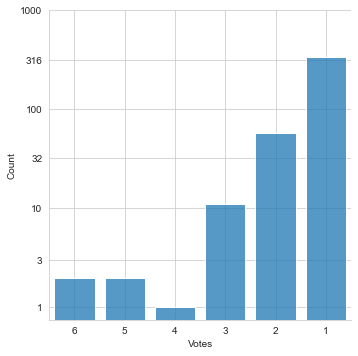

In [6]:
g = sns.displot(df_song_votes['Votes'], discrete=True, shrink=.8, log_scale=[0, 10])
g.set(xlim=[df_song_votes['Votes'].max() + .5, .5],
      xticks=np.arange(df_song_votes['Votes'].max(), 0, -1))
g.ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
g.ax.set_yticks((np.sqrt(10) ** np.arange(0, np.log(len(df)), 1)).round(0))
pass

In [7]:
df_artist_votes = count_votes(df, 'Artist').drop(columns=['Song'])
display(df_artist_votes[df_artist_votes['Votes'] > 1])

,Artist,Votes
0,Queen,12
1,The Rolling Stones,11
2,The Beatles,10
3,Elton John,9
4,Led Zeppelin,8
5,David Bowie,7
6,Pink Floyd,7
7,The Eagles,7
8,Radiohead,7
9,U2,6


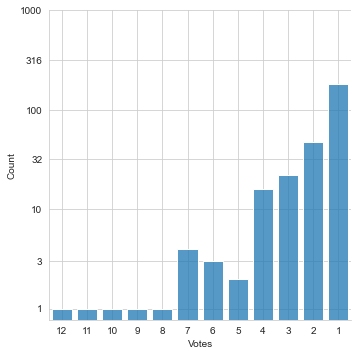

In [8]:
g = sns.displot(df_artist_votes['Votes'], discrete=True, shrink=.8, log_scale=[0, 10])
g.set(xlim=[df_artist_votes['Votes'].max() + .5, .5],
      xticks=np.arange(df_artist_votes['Votes'].max(), 0, -1))
g.ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
g.ax.set_yticks((np.sqrt(10) ** np.arange(0, np.log(len(df)), 1)).round(0))
pass

In [9]:
display(df_song_votes.head())
display(df_artist_votes.head())

,Artist,Song,Votes
0,The Eagles,Hotel California,6
1,Queen,Bohemian Rhapsody,6
2,Led Zeppelin,Stairway to Heaven,5
3,Toto,Africa,5
4,Tracy Chapman,Fast Car,4


,Artist,Votes
0,Queen,12
1,The Rolling Stones,11
2,The Beatles,10
3,Elton John,9
4,Led Zeppelin,8


In [42]:
df_combined_votes = df_song_votes.merge(
    df_artist_votes.rename(columns={'Votes': 'Artist votes'}),
    how='left', on='Artist'
)
display(df_combined_votes.sort_values(['Votes', 'Artist votes'], ascending=False).head(74))

,Artist,Song,Votes,Artist votes
1,Queen,Bohemian Rhapsody,6,12
0,The Eagles,Hotel California,6,7
2,Led Zeppelin,Stairway to Heaven,5,8
3,Toto,Africa,5,5
4,Tracy Chapman,Fast Car,4,4
10,Pink Floyd,Time,3,7
11,U2,Where the Streets Have No Name,3,6
5,Simon & Garfunkel,The Sound of Silence,3,4
6,Amy Winehouse,Back to Black,3,4
7,Eric Clapton,Layla,3,4


In [11]:
# set spotipy creds to enable API access

import spotipy
import sys
import credentials

credentials.set_credentials()
token = credentials.get_usertoken()
spotify = spotipy.Spotify(auth_manager=spotipy.oauth2.SpotifyClientCredentials(), auth=token)

In [29]:
def get_spotify_id(artist, song, max_tries=5):
    artist = ''.join([char if (char.isalnum() or char.isspace()) else ' ' for char in artist])
    song = ''.join([char if (char.isalnum() or char.isspace()) else ' ' for char in song])
    search_results = spotify.search(q=f'artist:{artist} track:{song}', type='track', limit=1)
    if len(search_results['tracks']['items']) > 0:
        spotify_id = search_results['tracks']['items'][0]['id']
    else:
        if max_tries > 0:
            spotify_id = get_spotify_id(artist, song, max_tries=max_tries - 1)
        else:
            spotify_id = np.nan
    return spotify_id

In [30]:
df_combined_votes['Spotify ID'] = df_combined_votes.apply(
    lambda row: get_spotify_id(row['Artist'], row['Song']), axis=1
)
display(df_combined_votes.head())

,Artist,Song,Votes,Artist votes,Spotify ID
0,The Eagles,Hotel California,6,7,5Viurwg2LYZjky18hqJN7J
1,Queen,Bohemian Rhapsody,6,12,7tFiyTwD0nx5a1eklYtX2J
2,Led Zeppelin,Stairway to Heaven,5,8,5CQ30WqJwcep0pYcV4AMNc
3,Toto,Africa,5,5,2374M0fQpWi3dLnB54qaLX
4,Tracy Chapman,Fast Car,4,4,2M9ro2krNb7nr7HSprkEgo


In [31]:
display(df_combined_votes[df_combined_votes['Spotify ID'].isna()].head(30))

,Artist,Song,Votes,Artist votes,Spotify ID
122,Bløf,Harder Dan Ik Hebben Kan,1,3,NaN
154,Di-Rect,Hold On,1,1,NaN
206,Jon Hassell & Ry Cooder,Nature Boy,1,1,NaN
283,Jacques Brel,Mijn Vlakke Land,1,1,NaN


In [38]:
playlist_id = '7GDLkBVcxRmLzckxowRfpv'
song_ids = df_combined_votes['Spotify ID'].dropna().values
sp.user_playlist_add_tracks('jvparidon', playlist_id, song_ids[:100])
sp.user_playlist_add_tracks('jvparidon', playlist_id, song_ids[100:200])
sp.user_playlist_add_tracks('jvparidon', playlist_id, song_ids[200:300])
sp.user_playlist_add_tracks('jvparidon', playlist_id, song_ids[300:400])
sp.user_playlist_add_tracks('jvparidon', playlist_id, song_ids[400:])

{'snapshot_id': 'MjAsZTc3ODQzMTJlZDhjMDk4MjZkOGNlYTM3MjY5NzFkYzA5NWM3NTJjNA=='}